In [22]:
from evaluate import load_model_with_weights
from pipeline.load import MyDataset
from torchvision.transforms.functional import to_tensor
import torch
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import jaccard_score
import pdb

In [2]:
device = torch.device('cuda')

In [3]:
model = load_model_with_weights(model_name="09-03-2020_16-44__Bigger_Backbone_Resnet_152")
dataset = MyDataset(in_dir="training_data")

training_data
training_data/images/*.jpg


In [4]:
model.to(device)

EncNet(
  (pretrained): ResNet(
    (conv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [98]:
with torch.no_grad():
    pred = model(to_tensor(dataset[3477][0]).unsqueeze(0).to(device))

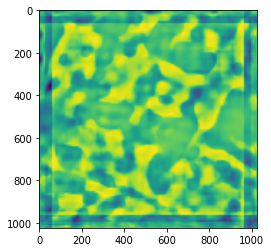

In [117]:
plt.imshow(pred[0].cpu().squeeze()[1])

In [145]:
y_pred = pred[2].argmax(dim=1).cpu().squeeze()
y = to_tensor(dataset[3477][1]).squeeze()

In [ ]:
jaccard_score(y_pred, y)

In [37]:
def display_pred(index=None):
    dataset = MyDataset(in_dir="training_data")
    if index==None:
        index = np.random.randint(0, len(dataset))
    image_tuple=dataset[index]
    print(image_tuple[2])
    print(index)
    inputs = to_tensor(image_tuple[0]).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(inputs)
    fig, ax = plt.subplots(ncols=4, figsize=(40,10))
    ax[0].imshow(image_tuple[0])
    ax[1].imshow(image_tuple[1])
    ax[2].imshow(prediction[0][0][1].cpu().squeeze())
    return prediction
#     ax[3].imshow(prediction[2].argmax(dim=1).cpu().squeeze())

training_data
training_data/images/*.jpg
training_data/images/a017f9_18432_31744_i.jpg
3961


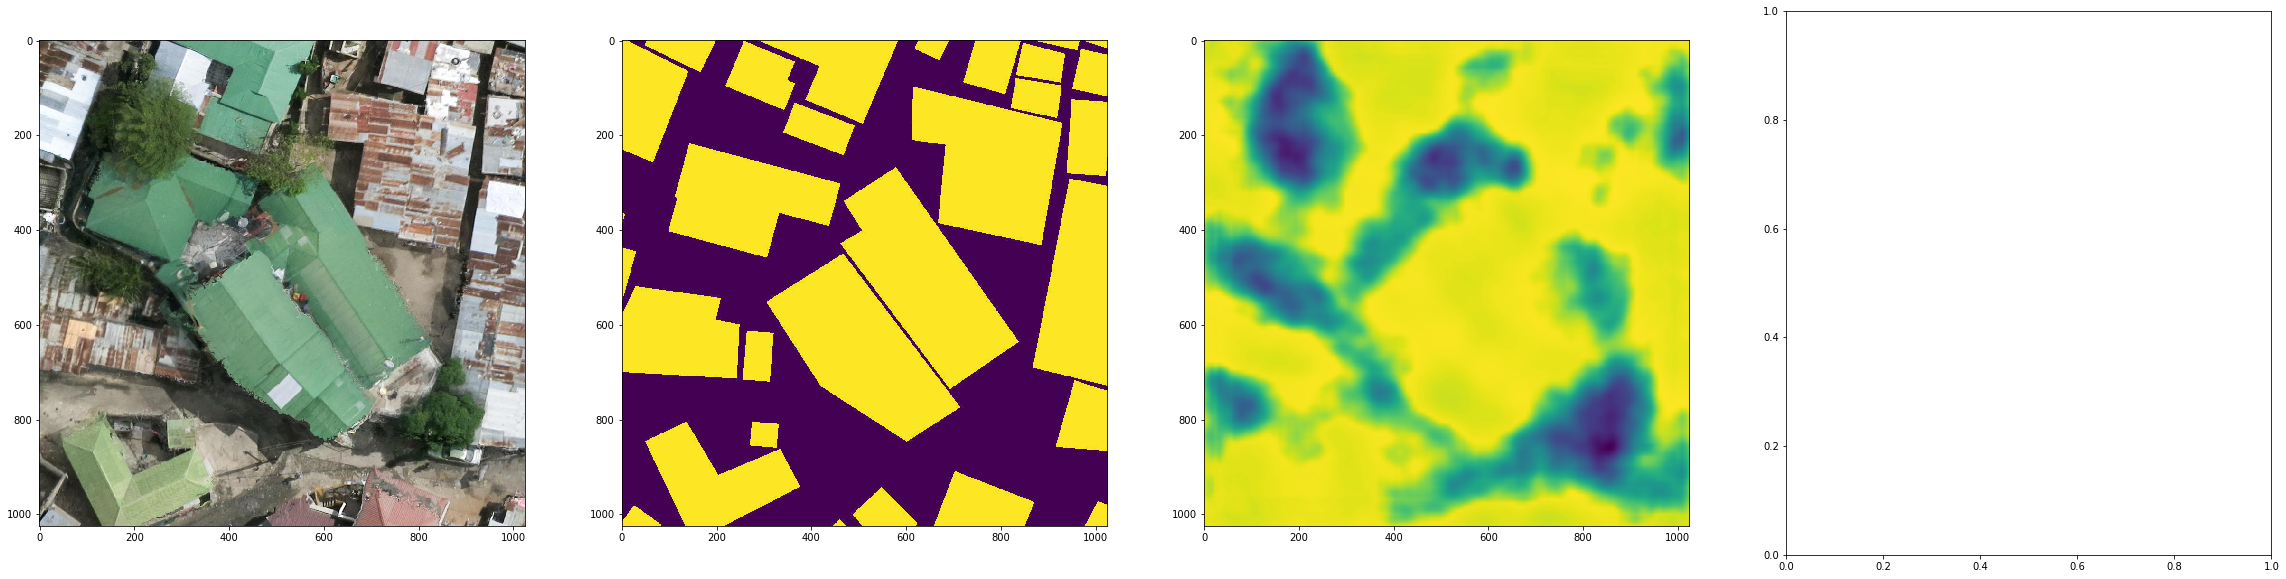

In [38]:
pred = display_pred(index=3961)

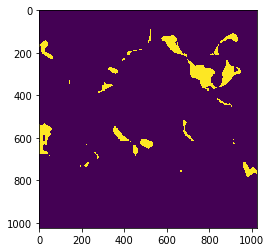

In [53]:
plt.imshow(pred[0][0].argmax(dim=0).cpu())

In [58]:
plt.imshowF.softmax(pred[0][0], dim=0).argmax(dim=0).cpu())

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0')